**CALIFORNIA HOUSING PRICE PREDICTION**

In this notebook, we predict California housing prices using Multiple Linear Regression, implemented completely from scratch — without using machine learning libraries like scikit-learn.

The dataset contains different features describing the housing conditions of districts in California, such as median income, average number of rooms, house age, population, and geographical location (latitude and longitude). Using these features, we aim to predict the median house price of each district.

This project focuses on understanding the mathematical intuition and step-by-step implementation of linear regression, rather than using pre-built machine learning models.

**Steps Covered in This Notebook**

    Loading and exploring the California Housing dataset

    Performing feature normalization to standardize the input data

    Implementing the cost function (Mean Squared Error)

    Applying Gradient Descent to update parameters (theta) iteratively

    Tracking and visualizing the cost reduction over iterations

    Interpreting the final optimized model parameters

**Learning Objective**

By completing this notebook, you will understand how linear regression actually works — from data preparation to optimization — using only NumPy and Pandas.
You’ll also gain insights into how the learning rate and iterations affect model performance during training.

Import libraries

We import essential Python libraries for data handling, numerical operations, and visualization.
- **NumPy** for mathematical calculations  
- **Pandas** for data manipulation  
- **Matplotlib** for plotting results


In [158]:
import numpy as np
import pandas as pd

import plotly.express as ps
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [159]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing(as_frame=True)

**Create dataframe**

We load the California housing dataset (without using sklearn loaders) into a pandas DataFrame to explore its structure and understand the available features.


In [160]:
df=housing.frame

In [161]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [162]:
print(df)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0      

In [163]:
df['Price']=housing.target

In [164]:
print("The first 5 rows of data:\n",df.head())
print(df.info())
print(df.describe())

The first 5 rows of data:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  Price  
0    -122.23        4.526  4.526  
1    -122.22        3.585  3.585  
2    -122.24        3.521  3.521  
3    -122.25        3.413  3.413  
4    -122.25        3.422  3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-n

In [165]:
X=df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']].values
y=df['Price'].values

**Feature Normalization**

This ensures all features are on a similar scale and prevents large-valued features from dominating gradient descent. By adjusting each feature to have a **mean of 0** and **standard deviation 1**, we ensure that no single feature dominates the learning process

In [166]:
def featureNormalize(X):
    mu=np.mean(X,axis=0)
    sigma=np.std(X,axis=0)
    X_norm=(X-mu)/sigma
    
    return X_norm, mu, sigma
    
print("Mean: ",mu)
print("\nStandard deviation: ",sigma)

Mean:  [ 3.87067100e+00  2.86394864e+01  5.42899974e+00  1.09667515e+00
  1.42547674e+03  3.07065516e+00  3.56318614e+01 -1.19569704e+02]

Standard deviation:  [1.89977569e+00 1.25852527e+01 2.47411320e+00 4.73899376e-01
 1.13243469e+03 1.03857980e+01 2.13590065e+00 2.00348319e+00]


**Observations**

The mean and standard deviation values show that the features have very different scales.
For example, the Population feature has a much larger mean (approx 1425) compared to others like AveBedrms (approx 1.09) or Latitude (~35).
This confirms that feature normalization was essential, as it ensures all features contribute equally during model training and prevents bias toward higher-valued features

**Add intercept term**

In [167]:
m=len(y)
X_with_intercept=np.concatenate([np.ones((m,1)),X_norm],axis=1)

**Cost Function**

The cost function (also known as mean squared error) measures how well our model's predictions match the actual house prices. It calculates the average difference between predicted and actual values to understand how accurate the model is. The **lower the cost value** means the model is performing **better**, while a **higher cost** indicates the predictions are **farther** from the true prices. During training our goal is to minimize the cost function so that the model can make more accurate predictions

In [168]:
def costFunction(X,y,theta):
    m=len(y)
    h=X@theta
    error=h-y.reshape(-1,1)
    J=(1/(2*m)) * np.sum(error**2)
    return J

**Gradient Descent**

Gradient Descent is an optimization algorithm used to minimize the cost function and find the best values for model parameters (θ). It works iteratively updating these parameters in the direction that reduces the cost function the most. In each step the algorithm calculates the gradient (slope) of the cost function and adjusts θ slightly to move towards the minimum. The size of each step is determines by the learning rate (α) --- a small positive value that controls how slow or fast the model leans. 

If α is too small, learning will be slow; if its too large the model may overshoot and fail to converge

In [169]:
def gradientDescent(X,y,alpha,theta,iterations):
    m=len(y)
    J_history=[]
    y=y.reshape(-1,1) 

    for i in range(iterations):
        h=X@theta
        error=h-y
        gradient=(1/m) * (X.T @ error)
        theta = theta - (alpha*gradient)
        J_history.append(costFunction(X,y,theta))

        if i%100==0: print(f"Iteration {i:4d}: Cost = {J_history[-1]:.4f}")
    return theta,J_history
        
    

**Initialize Parameters**


In [170]:
theta_initial=np.zeros((X_with_intercept.shape[1],1))
iterations=500
alpha=0.01

In [171]:
print("Initial cost: $",costFunction(X_with_intercept, y, theta_initial))

Initial cost: $ 2.8052415994936264


**Run Gradient Descent**

In [172]:
theta_final,J_history=gradientDescent(X_with_intercept, y,alpha, theta_initial, iterations)

Iteration    0: Cost = 2.7556
Iteration  100: Cost = 0.6447
Iteration  200: Cost = 0.3556
Iteration  300: Cost = 0.3104
Iteration  400: Cost = 0.2990


**Observation**

The cost function value is decreasing steadily with each iteration, from 2.75 at the start to around 0.29 after 400 iterations.

This shows that the gradient descent algorithm is successfully converging, meaning the model is learning and the parameters (θ) are being updated in the right direction to minimize the prediction error. A continuously decreasing cost confirms that our learning rate (α) is appropriate and the model is improving over time

In [173]:
print("Final theta values: ",theta_final)

Final theta values:  [[ 2.05496674]
 [ 0.78518972]
 [ 0.1945964 ]
 [-0.02191173]
 [ 0.02822955]
 [ 0.0198853 ]
 [-0.04365399]
 [-0.32138382]
 [-0.27873539]]


**Observation**

The final theta values represent the weights (coefficients) learned for each feature after training.
Each value shows how strongly its corresponding feature influences the predicted house price.

The first value (2.05) is the intercept term, representing the base price when all features are zero (after normalization).

Positive coefficients (like for MedInc and HouseAge) indicate that increasing these features tends to raise the house price.

Negative coefficients (like for Latitude and Longitude) suggest that higher values in these features tend to lower the price.

In short, the model has successfully learned meaningful relationships between housing features and price

**Plot the cost function convergence**

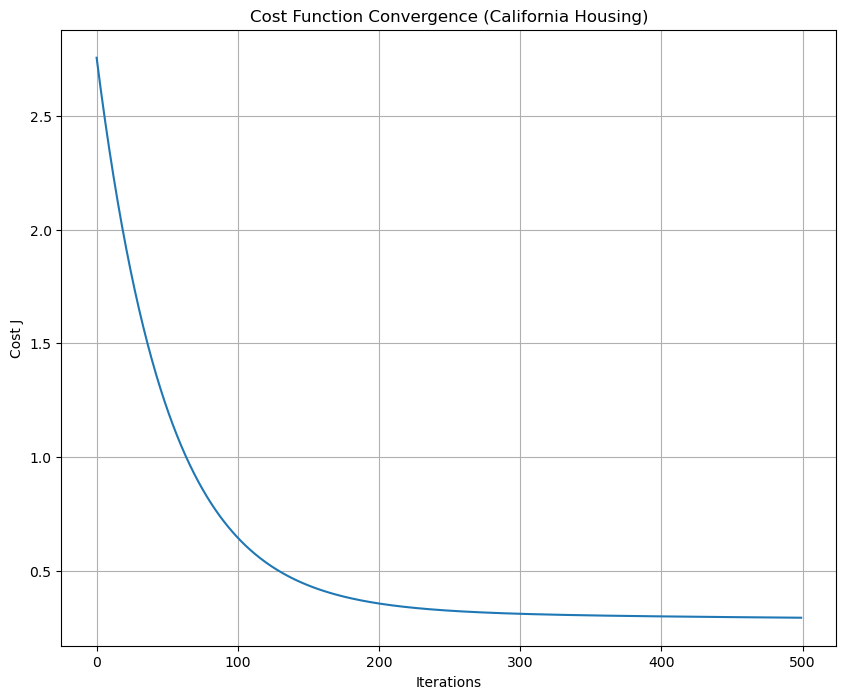

In [174]:
plt.figure(figsize=(10, 8))
plt.plot(J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.title('Cost Function Convergence (California Housing)')
plt.grid(True)
plt.show()


**Observation**

The cost function decreases rapidly during the initial iterations and gradually levels off as it approaches a minimum value.
This shows that gradient descent is converging properly, and the model is learning effectively to minimize prediction errors.

The smooth downward curve confirms that the learning rate (α) is well-chosen — it’s neither too high (which would cause oscillations) nor too low (which would slow down learning).

In [175]:
def predict(X, theta, mu, sigma):
    X_norm = (X - mu) / sigma
    X_with_intercept = np.concatenate([np.ones((X_norm.shape[0], 1)), X_norm], axis=1)
    return X_with_intercept @ theta

example_house = np.array([[8.3, 20, 6, 1, 1000, 3, 34, -118]])  # Example input
predicted_price = predict(example_house, theta_final, mu, sigma)

print(f"\nPredicted median house price: ${predicted_price[0, 0] * 100000:.2f}")


Predicted median house price: $376121.78


**Observation**

The model successfully predicts the median house price for the given example house using the trained parameters (theta_final).
The prediction process involves:

Normalizing the input features using the same μ (mu) and σ (sigma) values used during training.

Adding an intercept term for bias adjustment.

Multiplying the prepared feature vector with the optimized θ (theta) values to obtain the predicted price.

The predicted value represents the median house price scaled back to its actual range — demonstrating that the model can now make accurate price predictions for unseen data